In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 피마 인디언 데이터
- 서구 문명이 원시 문명에 유입되었을때의 토착민들의 건강상태 변화를 알게 해준 데이터
- 피마 인디언 마을에 패스트푸드점이 들어온 후, 당뇨병 환자가 얼마나 발생했는지 알 수 있따.
- outcome이 결과데이터 이며, 0은 당뇨음성, 1은 양성이다

In [2]:
train_df = pd.read_csv("data/diabetes_train.csv")
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22,1
596,0,67,76,0,0,45.3,0.194,46,0
597,1,89,24,19,25,27.8,0.559,21,0
598,1,173,74,0,0,36.8,0.088,38,1


In [3]:
test_df = pd.read_csv("data/diabetes_test.csv")
test_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,108,88,19,0,27.1,0.400,24
1,6,96,0,0,0,23.7,0.190,28
2,1,124,74,36,0,27.8,0.100,30
3,7,150,78,29,126,35.2,0.692,54
4,4,183,0,0,0,28.4,0.212,36
...,...,...,...,...,...,...,...,...
163,10,101,76,48,180,32.9,0.171,63
164,2,122,70,27,0,36.8,0.340,27
165,5,121,72,23,112,26.2,0.245,30
166,1,126,60,0,0,30.1,0.349,47


- Pregnancies : 임신 횟수
- Glucose : 포도당 부하 검사 수치
- BooldPressure : 혈압
- SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
- Insulin : 혈청 인슐린
- BMI : 체질량지수
- DiabetsPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 결과 값


### 데이터 프레임 정보 확인

In [4]:
train_df.info(), test_df.info(), 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               600 non-null    int64  
 1   Glucose                   600 non-null    int64  
 2   BloodPressure             600 non-null    int64  
 3   SkinThickness             600 non-null    int64  
 4   Insulin                   600 non-null    int64  
 5   BMI                       600 non-null    float64
 6   DiabetesPedigreeFunction  600 non-null    float64
 7   Age                       600 non-null    int64  
 8   Outcome                   600 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

(None, None)

### 데이터 전처리

In [5]:
data = pd.concat((train_df, test_df))

data.reset_index(drop=True, inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NaN
764,2,122,70,27,0,36.8,0.340,27,NaN
765,5,121,72,23,112,26.2,0.245,30,NaN
766,1,126,60,0,0,30.1,0.349,47,NaN


결측치가 아예 없다.

### Pregnancies
- 임신 횟수

In [6]:
# sns.countplot(data=data, x="Pregnancies", hue="Outcome")
# plt.show()

### BloodPressure
- 혈압

In [7]:
# sns.countplot(data=data, x="BloodPressure", hue="Outcome")
# plt.show()

혈압이 낮을 수록 당뇨병에 걸릴 확률이 낮다.

### SkinThickness 
- 팔 삼두근 뒤쪽의 피하지방 측정값 (두께 mm)

In [8]:
# sns.countplot(data=data, x="SkinThickness", hue="Outcome")
# plt.show()

### Gluecose
- 포도당 부하 검사 수치

In [9]:
# sns.countplot(data=data, x="Glucose", hue="Outcome")
# plt.show()

### Insulin
- 인슐린

In [10]:
# sns.countplot(data=data, x="Insulin", hue="Outcome")
# plt.show()

### BMI
- 체질량지수(체중/키)*2

In [11]:
# sns.countplot(data=data, x="BMI", hue="Outcome")
# plt.show()

BMI 지수가 낮으면 당뇨병에 걸릴 확률이 낮다.

### DiabetesPedigreeFunction
- 당뇨 내력 가중치 값

In [12]:
# sns.countplot(data=data, x='DiabetesPedigreeFunction', hue='Outcome')
# plt.show()


DiabetesPedigreeFunction 수치가 낮으면 당뇨병에 걸릴 확률이 낮아진다.

### 나이
- 나이

In [13]:
# sns.countplot(data=data, x='Age', hue='Outcome')
# plt.show()

아주 젊은 사람은 당뇨병에 걸릴 확률인 낮다.

### 이상치 처리

In [14]:
# Pregnancies (임신 횟수)
data["Pregnancies"].value_counts().sort_index()

# 임신 횟수의 0은 정상 데이터로 취급할 수 있다.

0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [15]:
# Glucose : 포도당 수치
data["Glucose"].value_counts().sort_index()

0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Glucose, Length: 136, dtype: int64

In [16]:
# # 포도당의 0을 처리한다.
# # outcome에 따른 포도당 평균 수치르 가져온다.
# a1 = data.groupby("Outcome")["Glucose"].mean()

# # outcome이 0인 사람들의 index를 가져온다.
# idx1= data.query("Outcome == 0 and Glucose == 0").index
# # outcome이 1인 사람들의 index
# idx2 = data.query("Outcome == 1 and Glucose == 0").index

# # 평균 값으로 채워준다.
# data.loc[idx1, "Glucose"] = a1.loc[0]
# data.loc[idx2, "Glucose"] = a1.loc[1]

# 전체 Glucose의 평균
a1 = data["Glucose"].mean()

# Glucose가 0인 사람들의 index를 가져오낟.
idx = data.query("Glucose == 0").index
# 평균으로 채워준다.
data.loc[idx, "Glucose"] = a1

data["Glucose"].value_counts().sort_index()

44.0     1
56.0     1
57.0     2
61.0     1
62.0     1
        ..
195.0    2
196.0    3
197.0    4
198.0    1
199.0    1
Name: Glucose, Length: 136, dtype: int64

In [17]:
# BloodPressure 
data["BloodPressure"].value_counts().sort_index()

0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: BloodPressure, dtype: int64

In [18]:
# data.groupby("Outcome")["BloodPressure"].mean()

# idx1 = data.query("BloodPressure == 0 and Outcome == 0").index
# idx2 = data.query("BloodPressure == 0 and Outcome == 1").index

# data.loc[idx1, "BloodPressure"] = a1.loc[0]
# data.loc[idx2, "BloodPressure"] = a1.loc[1]

# 전체 BloodPressure의 평균을 구한다.
a1 = data['BloodPressure'].mean()

# BloodPressure가 0인 사람들의 index를 가져온다.
idx = data.query('BloodPressure == 0').index

# 평균으로 채워준다.
data.loc[idx, 'BloodPressure'] = a1

data['BloodPressure'].value_counts().sort_index()


24.000000      1
30.000000      2
38.000000      1
40.000000      1
44.000000      4
46.000000      2
48.000000      5
50.000000     13
52.000000     11
54.000000     11
55.000000      2
56.000000     12
58.000000     21
60.000000     37
61.000000      1
62.000000     34
64.000000     43
65.000000      7
66.000000     30
68.000000     45
69.105469     35
70.000000     57
72.000000     44
74.000000     52
75.000000      8
76.000000     39
78.000000     45
80.000000     40
82.000000     30
84.000000     23
85.000000      6
86.000000     21
88.000000     25
90.000000     22
92.000000      8
94.000000      6
95.000000      1
96.000000      4
98.000000      3
100.000000     3
102.000000     1
104.000000     2
106.000000     3
108.000000     2
110.000000     3
114.000000     1
122.000000     1
Name: BloodPressure, dtype: int64

In [19]:
# SkinThickness
data["SkinThickness"].value_counts().sort_index()

0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64

In [20]:
# data.groupby("Outcome")["SkinThickness"].mean()
# 전체 BloodPressure의 평균을 구한다.
a1 = data['SkinThickness'].mean()

# BloodPressure가 0인 사람들의 index를 가져온다.
idx = data.query('SkinThickness == 0').index

# 평균으로 채워준다.
data.loc[idx, 'SkinThickness'] = a1

data['SkinThickness'].value_counts().sort_index()


7.000000       2
8.000000       2
10.000000      5
11.000000      6
12.000000      7
13.000000     11
14.000000      6
15.000000     14
16.000000      6
17.000000     14
18.000000     20
19.000000     18
20.000000     13
20.536458    227
21.000000     10
22.000000     16
23.000000     22
24.000000     12
25.000000     16
26.000000     16
27.000000     23
28.000000     20
29.000000     17
30.000000     27
31.000000     19
32.000000     31
33.000000     20
34.000000      8
35.000000     15
36.000000     14
37.000000     16
38.000000      7
39.000000     18
40.000000     16
41.000000     15
42.000000     11
43.000000      6
44.000000      5
45.000000      6
46.000000      8
47.000000      4
48.000000      4
49.000000      3
50.000000      3
51.000000      1
52.000000      2
54.000000      2
56.000000      1
60.000000      1
63.000000      1
99.000000      1
Name: SkinThickness, dtype: int64

In [21]:
data["Insulin"].value_counts().sort_index()

0      374
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [22]:
data["BMI"].value_counts().sort_index()

0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: BMI, Length: 248, dtype: int64

In [23]:
data["Age"].value_counts().sort_index()

21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: Age, dtype: int64

In [24]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
# 전체 BloodPressure의 평균을 구한다.
a1 = data['Insulin'].mean()

# BloodPressure가 0인 사람들의 index를 가져온다.
idx = data.query('Insulin == 0').index

# 평균으로 채워준다.
data.loc[idx, 'Insulin'] = a1

data['Insulin'].value_counts().sort_index()


14.0     1
15.0     1
16.0     1
18.0     2
22.0     1
        ..
579.0    1
600.0    1
680.0    1
744.0    1
846.0    1
Name: Insulin, Length: 186, dtype: int64

In [26]:
# 전체 BloodPressure의 평균을 구한다.
a1 = data['BMI'].mean()

# BloodPressure가 0인 사람들의 index를 가져온다.
idx = data.query('BMI == 0').index

# 평균으로 채워준다.
data.loc[idx, 'BMI'] = a1

data['BMI'].value_counts().sort_index()


18.2    3
18.4    1
19.1    1
19.3    1
19.4    1
       ..
53.2    1
55.0    1
57.3    1
59.4    1
67.1    1
Name: BMI, Length: 248, dtype: int64

In [27]:
# sns.countplot(data=data, x="Insulin", hue="Outcome")
# plt.show()

# 추정치로 채우는것이 이렇게 위험합니다.
# 먼저 실제로 존재하는 넣을 수 있는 데이터를 찾아야한다.

### 머신러닝을 위한 데이터 전처리

In [28]:
df1 = data.copy()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.0
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,NaN
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,NaN
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,NaN
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,NaN


In [29]:
# 전부다 관련이 있는 것 같다.
# Outcome만 삭제하도록 하자
df1.drop("Outcome", axis=1, inplace=True)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [30]:
temp = df1.copy()
temp["Outcome"] = data["Outcome"]


In [31]:
# 값을 비율로 변경한다.
temp["Pregnancies"] = temp.groupby("Pregnancies")["Outcome"].transform("mean")
temp["Glucose"] = temp.groupby("Glucose")["Outcome"].transform("mean")
temp["BloodPressure"] = temp.groupby("BloodPressure")["Outcome"].transform("mean")
temp["SkinThickness"] = temp.groupby("SkinThickness")["Outcome"].transform("mean")
temp["Insulin"] = temp.groupby("Insulin")["Outcome"].transform("mean")
temp["BMI"] = temp.groupby("BMI")["Outcome"].transform("mean")
temp["DiabetesPedigreeFunction"] = temp.groupby("DiabetesPedigreeFunction")["Outcome"].transform("mean")
temp["Age"] = temp.groupby("Age")["Outcome"].transform("mean")

temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,0.378378,0.636364,0.363322,0.571429,1.0,0.250000,1.0
1,0.188119,0.142857,0.379310,0.307692,0.363322,0.250000,0.0,0.526316,0.0
2,0.593750,1.000000,0.297297,0.388571,0.363322,1.000000,1.0,0.615385,1.0
3,0.188119,0.000000,0.379310,0.176471,0.000000,0.000000,0.0,0.096154,0.0
4,0.354839,0.285714,1.000000,0.636364,0.666667,1.000000,1.0,0.600000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,1.000000,1.000000,1.000000,NaN,0.000000,NaN
764,0.210526,0.300000,0.413043,0.285714,0.363322,0.200000,0.5,0.238095,NaN
765,0.408163,0.500000,0.378378,0.176471,NaN,0.000000,0.0,0.312500,NaN
766,0.188119,0.166667,0.192308,0.388571,0.363322,0.285714,0.0,0.750000,NaN


In [32]:
# 평균
temp["Mean"] = 0
# 최대
temp["Max"] = 0
# 최소
temp["Min"] = 0
# 최대-최소
temp["Diff"] = 0
# std
temp["Std"] = 0


In [33]:
temp["Mean"] = temp.mean(axis=1)
temp["Max"] = temp.max(axis=1)
temp["Min"] = temp.min(axis=1)
temp["Diff"] = temp["Max"] - temp["Min"]
temp["Std"] = temp.std(axis=1)
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Mean,Max,Min,Diff,Std
0,0.270270,0.750000,0.378378,0.636364,0.363322,0.571429,1.0,0.250000,1.0,0.372840,1.000000,0.0,1.000000,0.364378
1,0.188119,0.142857,0.379310,0.307692,0.363322,0.250000,0.0,0.526316,0.0,0.154115,0.526316,0.0,0.526316,0.202889
2,0.593750,1.000000,0.297297,0.388571,0.363322,1.000000,1.0,0.615385,1.0,0.447023,1.000000,0.0,1.000000,0.381229
3,0.188119,0.000000,0.379310,0.176471,0.000000,0.000000,0.0,0.096154,0.0,0.060004,0.379310,0.0,0.379310,0.155536
4,0.354839,0.285714,1.000000,0.636364,0.666667,1.000000,1.0,0.600000,1.0,0.467399,1.000000,0.0,1.000000,0.375762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,1.000000,1.000000,1.000000,NaN,0.000000,NaN,0.340577,1.000000,0.0,1.000000,0.439576
764,0.210526,0.300000,0.413043,0.285714,0.363322,0.200000,0.5,0.238095,NaN,0.193131,0.500000,0.0,0.500000,0.170120
765,0.408163,0.500000,0.378378,0.176471,NaN,0.000000,0.0,0.312500,NaN,0.147959,0.500000,0.0,0.500000,0.212824
766,0.188119,0.166667,0.192308,0.388571,0.363322,0.285714,0.0,0.750000,NaN,0.179592,0.750000,0.0,0.750000,0.280616


In [34]:
df1["Mean"] = temp["Mean"]
df1["Max"] = temp["Max"] 
df1["Min"] = temp["Min"]
df1["Diff"] = temp["Diff"] 
df1["Std"] = temp["Std"] 
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Mean,Max,Min,Diff,Std
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0.372840,1.000000,0.0,1.000000,0.364378
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.154115,0.526316,0.0,0.526316,0.202889
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.447023,1.000000,0.0,1.000000,0.381229
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.060004,0.379310,0.0,0.379310,0.155536
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0.467399,1.000000,0.0,1.000000,0.375762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0.340577,1.000000,0.0,1.000000,0.439576
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0.193131,0.500000,0.0,0.500000,0.170120
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0.147959,0.500000,0.0,0.500000,0.212824
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,0.179592,0.750000,0.0,0.750000,0.280616


In [35]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Mean                        0
Max                         0
Min                         0
Diff                        0
Std                         0
dtype: int64

### 학습 데이터를 준비한다.

In [36]:
# 데이터를 준비한다.
# 학습 데이터 개수
n_train = len(train_df)
# 예측 데이터 개수
n_test = len(test_df)

X_train = df1[:n_train]
y_train = train_df['Outcome']

# X_train.drop('Outcome', inplace=True, axis=1)

display(X_train)
display(y_train)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Mean,Max,Min,Diff,Std
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0.372840,1.000000,0.0,1.000000,0.364378
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.154115,0.526316,0.0,0.526316,0.202889
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.447023,1.000000,0.0,1.000000,0.381229
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.060004,0.379310,0.0,0.379310,0.155536
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0.467399,1.000000,0.0,1.000000,0.375762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,188.0,82.0,14.000000,185.000000,32.0,0.682,22,0.404800,1.000000,0.0,1.000000,0.405167
596,0,67.0,76.0,20.536458,79.799479,45.3,0.194,46,0.152496,0.545455,0.0,0.545455,0.238995
597,1,89.0,24.0,19.000000,25.000000,27.8,0.559,21,0.030509,0.188119,0.0,0.188119,0.081845
598,1,173.0,74.0,20.536458,79.799479,36.8,0.088,38,0.312228,1.000000,0.0,1.000000,0.354500


0      1
1      0
2      1
3      0
4      1
      ..
595    1
596    0
597    0
598    1
599    0
Name: Outcome, Length: 600, dtype: int64

In [37]:
# 표준화 작업
scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train = scaler1.transform(X_train)
X_train


array([[ 0.64896283,  0.87436879,  0.0077933 , ...,  0.        ,
         1.27211701,  1.18791721],
       [-0.83948403, -1.1766464 , -0.49278538, ...,  0.        ,
        -0.58027394, -0.69551961],
       [ 1.24434157,  2.01382167, -0.65964493, ...,  0.        ,
         1.27211701,  1.38444803],
       ...,
       [-0.83948403, -1.04642321, -3.99683609, ...,  0.        ,
        -1.90282809, -2.10724035],
       [-0.83948403,  1.68826371,  0.17465285, ...,  0.        ,
         1.27211701,  1.07270683],
       [-0.83948403, -0.39530728, -2.82881918, ...,  0.        ,
        -0.86093923, -0.95133043]])

### 기본 모델 사용하기

In [38]:
# 사용할 모델들
model1 = KNeighborsClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = (
    ('model1', model1), ('model2', model2), ('model3', model3),
    ('model4', model4), ('model5', model5), ('model6', model6),
    ('model7', model7), ('model8', model8), ('model9', model9),
)

model10 = VotingClassifier(estimators=model_list, voting='hard')
model11 = VotingClassifier(estimators=model_list, voting='soft')


In [39]:
# 사용할 알고리즘을 리스트에 담는다.
check_list = [
    model1, model2, model3, model4, model5, model6,
    model7, model8, model9, model10, model11
]
# 교차 검증 평균을 담을 리스트
score_list = []


In [40]:
# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for ml in check_list :
    score = cross_val_score(ml, X_train, y_train, scoring='f1', cv=kfold)
    score_list.append(score.mean())
    
score_list


[0.9951103160405486,
 1.0,
 0.9975609756097562,
 0.9974358974358974,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9974358974358974,
 1.0,
 1.0]

In [41]:
# 시각화를 위해 데이터 프레임을 생성한다.
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Score
0,LogisticRegression,1.000000
1,RandomForest,1.000000
2,AdaBoost,1.000000
3,GradianBoost,1.000000
4,LGBM,1.000000
5,Voting(Hard),1.000000
6,Voting(Soft),1.000000
7,SVC,0.997561
8,DecisionTree,0.997436
9,XGBoost,0.997436


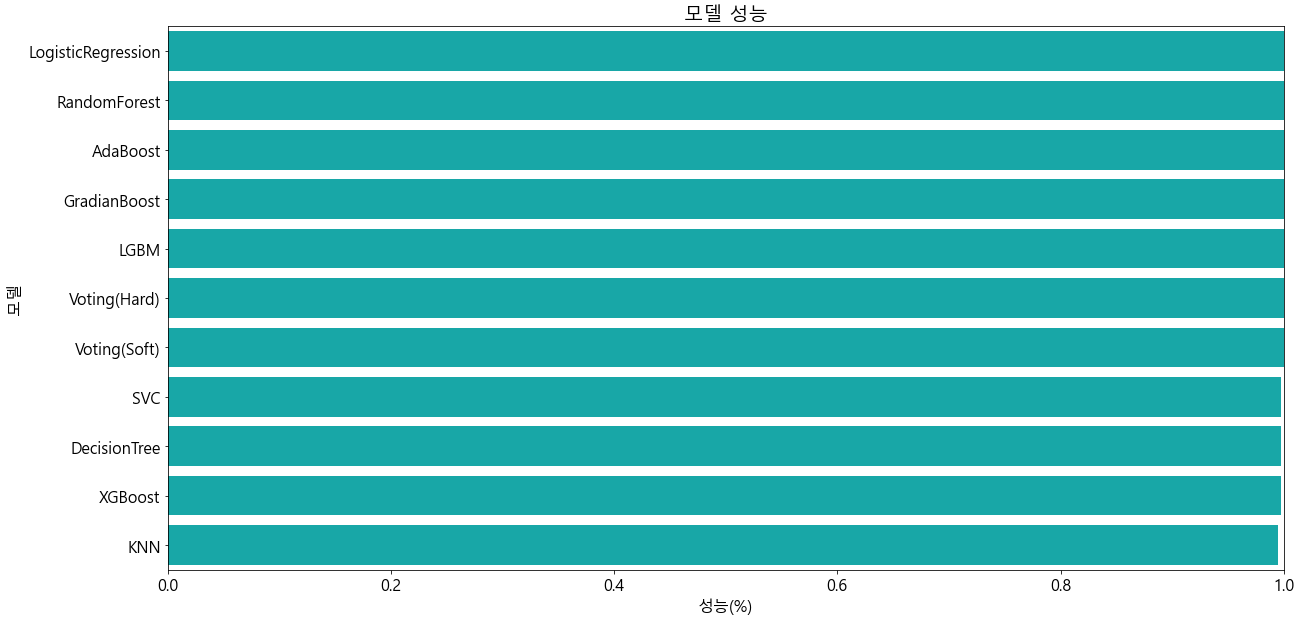

In [42]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()


### 하이퍼 파라미터 튜닝

In [43]:
# KNN
params = {
    "n_neighbors": list(range(1, 11))
}

# 사용할 모델 객체를 생성한다.
model1 = KNeighborsClassifier()

# 최적의 하이퍼 파라미터를 찾는다.
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring="f1", cv=kfold)
start = datetime.datetime.now()

grid_clf1.fit(X_train, y_train)

end = datetime.datetime.now()

# 결과 출력
print(f"최적의 하이퍼 파라미터 : {grid_clf1.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf1.best_score_}")
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'n_neighbors': 4}
최적의 모델 평균 성능 : 0.9974358974358974
총 튜닝 시간 : 0:00:01.028816


In [44]:
# LogisticRegression
# penalty : 규제의 종류(l1, l2, elasticnet(l1,l2 모두 사용하는것), none)
# C: 규제의 강도 
params = {
    "penalty" : ["l1", "l2", "elasticnet", "none"],
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring="f1", cv=kfold)
start = datetime.datetime.now()

grid_clf2.fit(X_train, y_train)

end = datetime.datetime.now()
print(f"최적의 하이퍼 파라미터 : {grid_clf2.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf2.best_score_}")
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:03.840030


In [45]:
# SVM(SVC)
# SVM은 l2로 penalty가 고정되어 있다.
# C: 규제의 강도 
params = {
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring="f1", cv=kfold)
start = datetime.datetime.now()

grid_clf3.fit(X_train, y_train)

end = datetime.datetime.now()
print(f"최적의 하이퍼 파라미터 : {grid_clf3.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf3.best_score_}")
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.9975609756097562
총 튜닝 시간 : 0:00:00.888763


In [46]:
# DecisonTree
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model4 = DecisionTreeClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='f1', cv=kfold)
start = datetime.datetime.now()

grid_clf4.fit(X_train, y_train)

end = datetime.datetime.now()
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf4.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'max_depth': None}
최적의 모델 평균 성능 : 0.9974358974358974
총 튜닝 시간 : 0:00:00.721355


In [47]:
# RandomForest
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model5 = RandomForestClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf5.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf5.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:05:05.916945


In [48]:
# AdaBoost
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model6 = AdaBoostClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf6.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf6.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 0.0001, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:01.261058


In [49]:
# GradientBoosting
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = GradientBoostingClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf7.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf7.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 100}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:01:03.712974


In [50]:
# Light GBM
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = LGBMClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf8.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf8.best_score_}')
print(f'총 튜닝 시간 : {end - start}')


최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 150}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:20.251763


In [51]:
# XGBoost
# booster : 내부에 사용할 알고리즘
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'booster' : ["gbtree", "gblinear"],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model9 = XGBClassifier(random_state=1, silent=True, verbosity=0 )
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='f1', cv=kfold)

start = datetime.datetime.now()

grid_clf9.fit(X_train, y_train)

end = datetime.datetime.now()

print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf9.best_score_}')
print(f"총 튜닝 시간 : {end - start}")

최적의 하이퍼 파라미터 : {'booster': 'gblinear', 'learning_rate': 0.01, 'n_estimators': 200}
최적의 모델 평균 성능 : 1.0
총 튜닝 시간 : 0:00:50.027104


In [52]:
# voting

# SVC에서 확률을 확인할 수 있도록 설정한다.
grid_clf3.best_estimator_.probability=True

model_list = (
    ("model1", grid_clf1.best_estimator_),
    ("model2", grid_clf2.best_estimator_),
    ("model3", grid_clf3.best_estimator_),
    ("model4", grid_clf4.best_estimator_),
    ("model5", grid_clf5.best_estimator_),
    ("model6", grid_clf6.best_estimator_),
    ("model7", grid_clf7.best_estimator_),
    ("model8", grid_clf8.best_estimator_),
    ("model9", grid_clf9.best_estimator_),
)

model10 = VotingClassifier(estimators=model_list, voting="hard")
model11 = VotingClassifier(estimators=model_list, voting="soft")

In [53]:
# voting 모델 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r10 = cross_val_score(model10, X_train, y_train, scoring="f1", cv=kfold)
r11 = cross_val_score(model11, X_train, y_train, scoring="f1", cv=kfold)

In [54]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_,
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_,
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_,
    r10.mean(), r11.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Score
0,LogisticRegression,1.000000
1,RandomForest,1.000000
2,AdaBoost,1.000000
3,GradianBoost,1.000000
4,LGBM,1.000000
5,XGBoost,1.000000
6,Voting(Hard),1.000000
7,Voting(Soft),1.000000
8,SVC,0.997561
9,KNN,0.997436


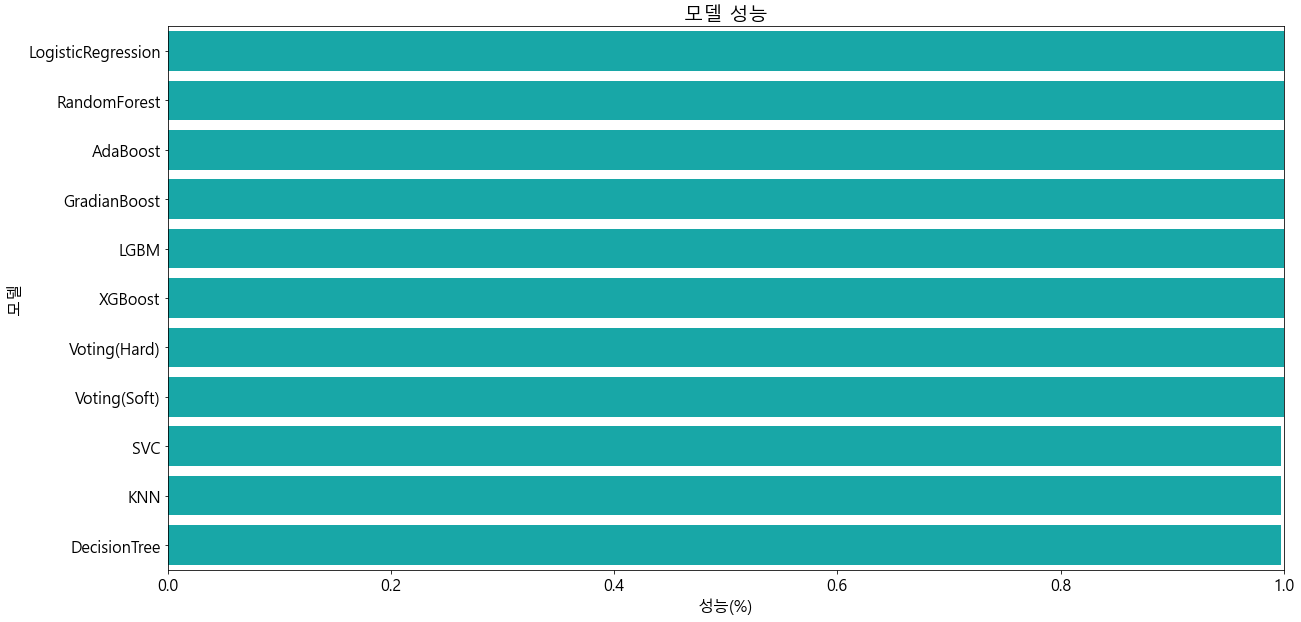

In [55]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()


In [56]:
model1 = grid_clf1.best_estimator_
model2 = grid_clf2.best_estimator_
model3 = grid_clf3.best_estimator_
model4 = grid_clf4.best_estimator_
model5 = grid_clf5.best_estimator_
model6 = grid_clf6.best_estimator_
model7 = grid_clf7.best_estimator_
model8 = grid_clf8.best_estimator_
model9 = grid_clf9.best_estimator_


In [57]:
# 학습용과 검증용으로 나ㅜㄴㄴ다.
x1, x2, y1, y2 = train_test_split(X_train, y_train, test_size=.3, random_state=1)

In [58]:
# 학습용 데이터로 학습을 시킨다.
model1.fit(x1, y1)
model2.fit(x1, y1)
model3.fit(x1, y1)
model4.fit(x1, y1)
model5.fit(x1, y1)
model6.fit(x1, y1)
model7.fit(x1, y1)
model8.fit(x1, y1)
model9.fit(x1, y1)
model10.fit(x1, y1)
model11.fit(x1, y1)


VotingClassifier(estimators=(('model1', KNeighborsClassifier(n_neighbors=4)),
                             ('model2',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('model3', SVC(C=1, probability=True)),
                             ('model4', DecisionTreeClassifier(random_state=1)),
                             ('model5',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.0001,
                                                 random_state=1))...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=No

In [59]:
# 검증 데이터를 통해 예측 결과를 가져온다
y_pred1 = model1.predict(x2)
y_pred2 = model2.predict(x2)
y_pred3 = model3.predict(x2)
y_pred4 = model4.predict(x2)
y_pred5 = model5.predict(x2)
y_pred6 = model6.predict(x2)
y_pred7 = model7.predict(x2)
y_pred8 = model8.predict(x2)
y_pred9 = model9.predict(x2)
y_pred10 = model10.predict(x2)
y_pred11 = model11.predict(x2)


In [60]:
# 진짜 결과와 비교해서 평가를 실시한다.
r1 = f1_score(y2, y_pred1)
r2 = f1_score(y2, y_pred2)
r3 = f1_score(y2, y_pred3)
r4 = f1_score(y2, y_pred4)
r5 = f1_score(y2, y_pred5)
r6 = f1_score(y2, y_pred6)
r7 = f1_score(y2, y_pred7)
r8 = f1_score(y2, y_pred8)
r9 = f1_score(y2, y_pred9)
r10 = f1_score(y2, y_pred10)
r11 = f1_score(y2, y_pred11)

In [61]:
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : [r1.mean(), r2.mean(), r3.mean(), r4.mean(),
               r5.mean(), r6.mean(), r7.mean(), r8.mean(),
               r9.mean(), r10.mean(), r11.mean()]
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Score
0,KNN,1.0
1,LogisticRegression,1.0
2,SVC,1.0
3,DecisionTree,1.0
4,RandomForest,1.0
5,AdaBoost,1.0
6,GradianBoost,1.0
7,LGBM,1.0
8,XGBoost,1.0
9,Voting(Hard),1.0


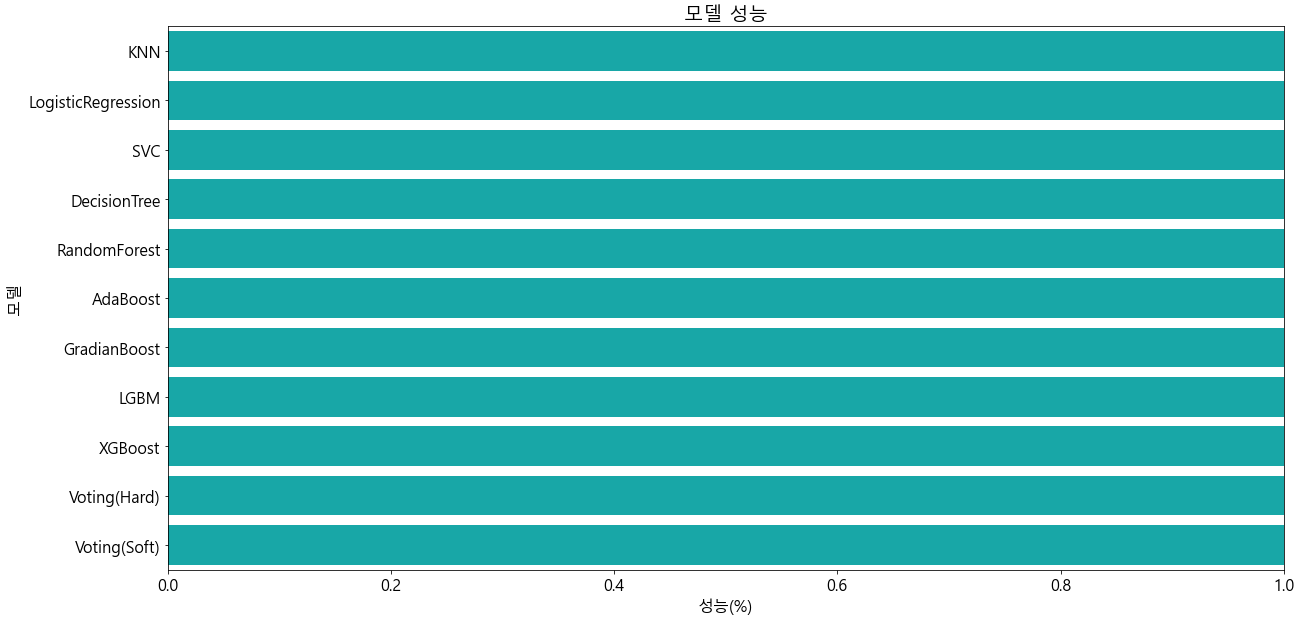

In [62]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()


###  최적으로 선정된 모델에 모든 데이터를 학습시킨다


### 모든 모델에 모든 데이터를 학습시킨다


In [63]:
model1.fit(X_train ,y_train)
model2.fit(X_train ,y_train)
model3.fit(X_train ,y_train)
model4.fit(X_train ,y_train)
model5.fit(X_train ,y_train)
model6.fit(X_train ,y_train)
model7.fit(X_train ,y_train)
model8.fit(X_train ,y_train)
model9.fit(X_train ,y_train)
model10.fit(X_train ,y_train)
model11.fit(X_train ,y_train)


VotingClassifier(estimators=(('model1', KNeighborsClassifier(n_neighbors=4)),
                             ('model2',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('model3', SVC(C=1, probability=True)),
                             ('model4', DecisionTreeClassifier(random_state=1)),
                             ('model5',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.0001,
                                                 random_state=1))...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=No

### 결과를 예측 한다


In [65]:
X_test = df1[n_train:]
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Mean,Max,Min,Diff,Std
600,1,108.0,88.000000,19.000000,79.799479,27.1,0.400,24,0.174149,0.500000,0.0,0.500000,0.185315
601,6,96.0,69.105469,20.536458,79.799479,23.7,0.190,28,0.143928,0.464286,0.0,0.464286,0.205114
602,1,124.0,74.000000,36.000000,79.799479,27.8,0.100,30,0.196690,0.625000,0.0,0.625000,0.247940
603,7,150.0,78.000000,29.000000,126.000000,35.2,0.692,54,0.169238,0.750000,0.0,0.750000,0.304273
604,4,183.0,69.105469,20.536458,79.799479,28.4,0.212,36,0.315884,1.000000,0.0,1.000000,0.391497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.000000,48.000000,180.000000,32.9,0.171,63,0.340577,1.000000,0.0,1.000000,0.439576
764,2,122.0,70.000000,27.000000,79.799479,36.8,0.340,27,0.193131,0.500000,0.0,0.500000,0.170120
765,5,121.0,72.000000,23.000000,112.000000,26.2,0.245,30,0.147959,0.500000,0.0,0.500000,0.212824
766,1,126.0,60.000000,20.536458,79.799479,30.1,0.349,47,0.179592,0.750000,0.0,0.750000,0.280616


In [66]:
# 표준화 
X_test = scaler1.transform(X_test)
X_test


array([[-0.83948403, -0.42786307,  1.34266976, ...,  0.        ,
        -0.68318455, -0.90048264],
       [ 0.64896283, -0.81853263, -0.2336968 , ...,  0.        ,
        -0.82284894, -0.66957412],
       [-0.83948403,  0.09302967,  0.17465285, ...,  0.        ,
        -0.19435916, -0.17008831],
       ...,
       [ 0.35127346, -0.00463772,  0.0077933 , ...,  0.        ,
        -0.68318455, -0.57965077],
       [-0.83948403,  0.15814127, -0.99336405, ...,  0.        ,
         0.29446623,  0.21100458],
       [-0.83948403, -0.91620002, -0.15906626, ...,  0.        ,
        -0.29212424, -0.30009714]])

In [67]:
# 예측 결과를 추출한다.
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)
y_pred7 = model7.predict(X_test)
y_pred8 = model8.predict(X_test)
y_pred9 = model9.predict(X_test)
y_pred10 = model10.predict(X_test)
y_pred11 = model11.predict(X_test)


In [68]:
y_pred_proba1 = model1.predict_proba(X_test)
y_pred_proba2 = model2.predict_proba(X_test)
y_pred_proba3 = model3.predict_proba(X_test)
y_pred_proba4 = model4.predict_proba(X_test)
y_pred_proba5 = model5.predict_proba(X_test)
y_pred_proba6 = model6.predict_proba(X_test)
y_pred_proba7 = model7.predict_proba(X_test)
y_pred_proba8 = model8.predict_proba(X_test)
y_pred_proba9 = model9.predict_proba(X_test)
# y_pred_proba10 = model10.predict_proba(X_test)
y_pred_proba11 = model11.predict_proba(X_test)


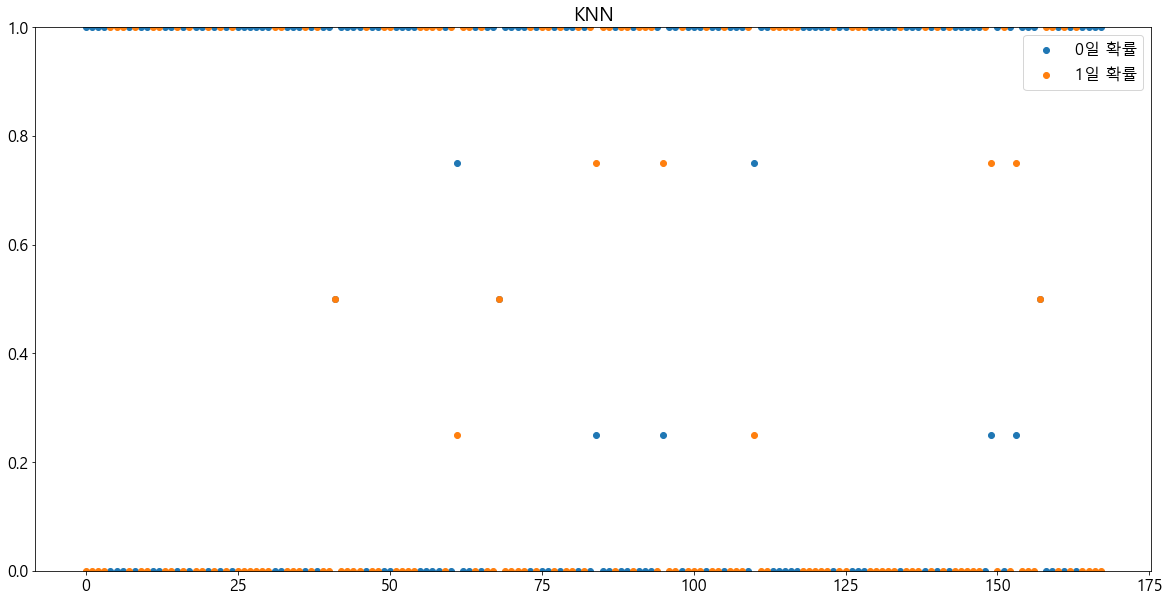

In [69]:
# 0일 확률들
a10 = y_pred_proba1[:, 0]
# 1일 확률들
a11 = y_pred_proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('KNN')
plt.show()


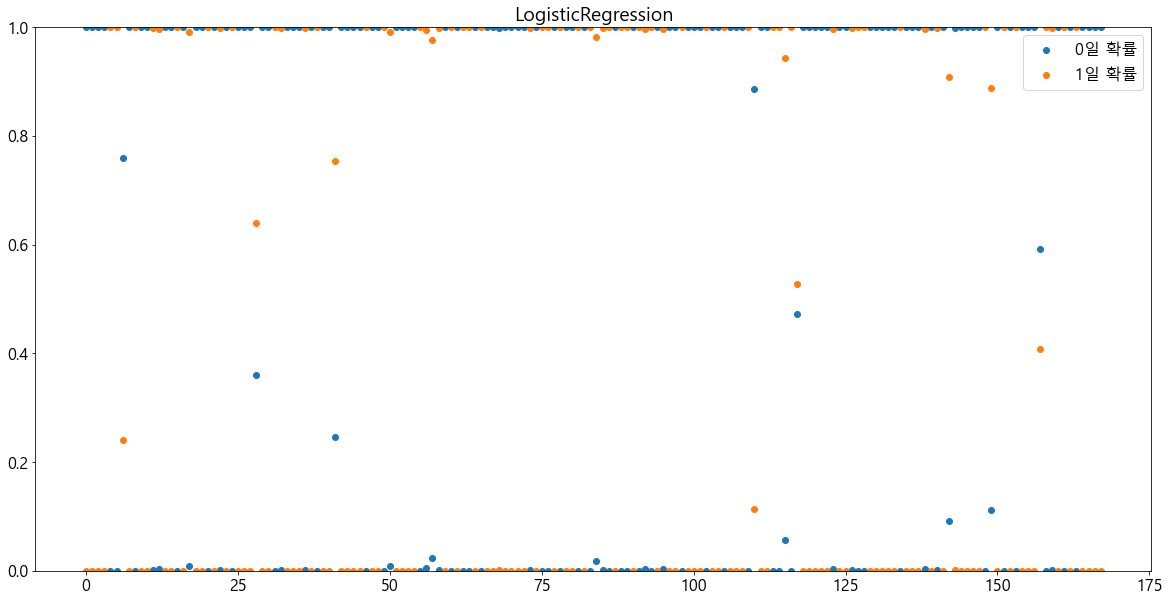

In [70]:
# 0일 확률들
a10 = y_pred_proba2[:, 0]
# 1일 확률들
a11 = y_pred_proba2[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('LogisticRegression')
plt.show()


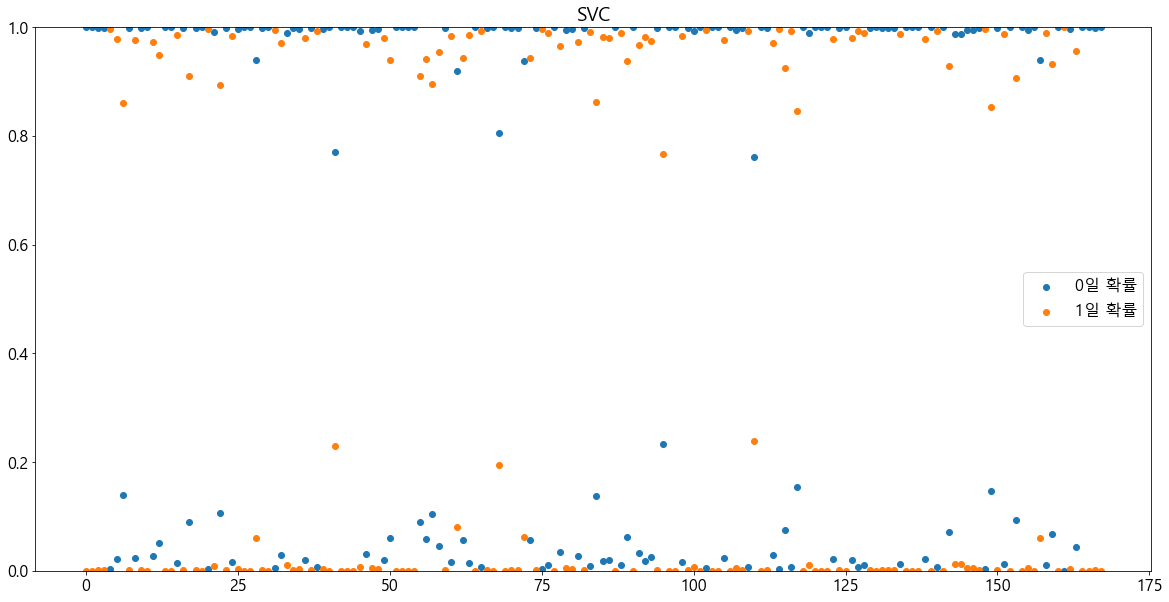

In [71]:
# 0일 확률들
a10 = y_pred_proba3[:, 0]
# 1일 확률들
a11 = y_pred_proba3[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('SVC')
plt.show()


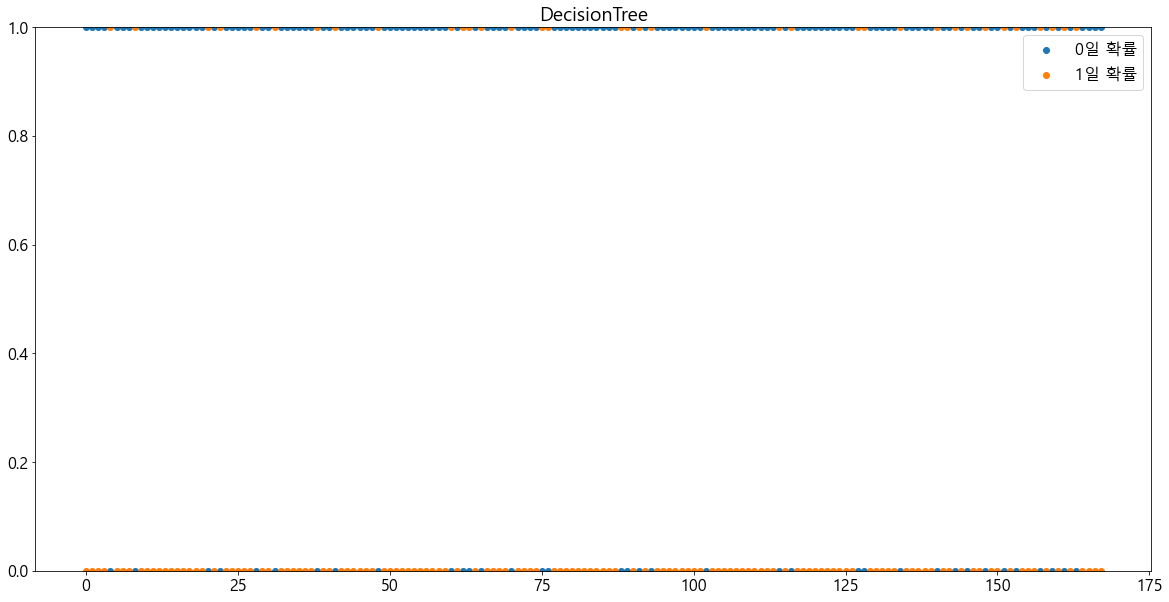

In [72]:
# 0일 확률들
a10 = y_pred_proba4[:, 0]
# 1일 확률들
a11 = y_pred_proba4[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('DecisionTree')
plt.show()
# 예, 아니요만 있는 특성상, 무조건 극과극으로 결과가 나온다.

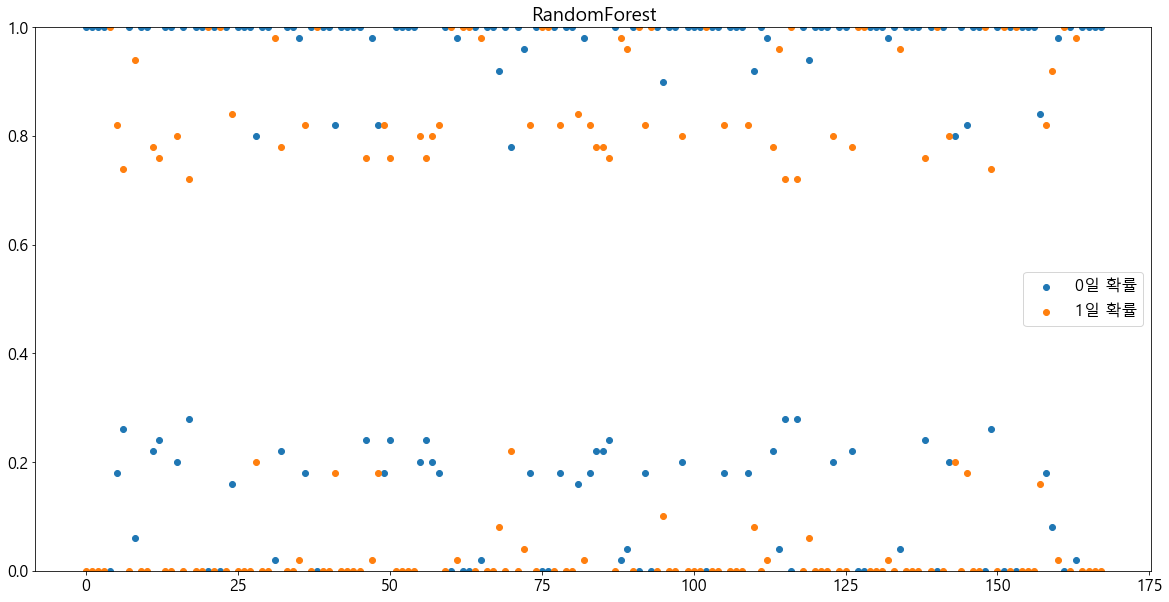

In [73]:
# 0일 확률들
a10 = y_pred_proba5[:, 0]
# 1일 확률들
a11 = y_pred_proba5[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('RandomForest')
plt.show()


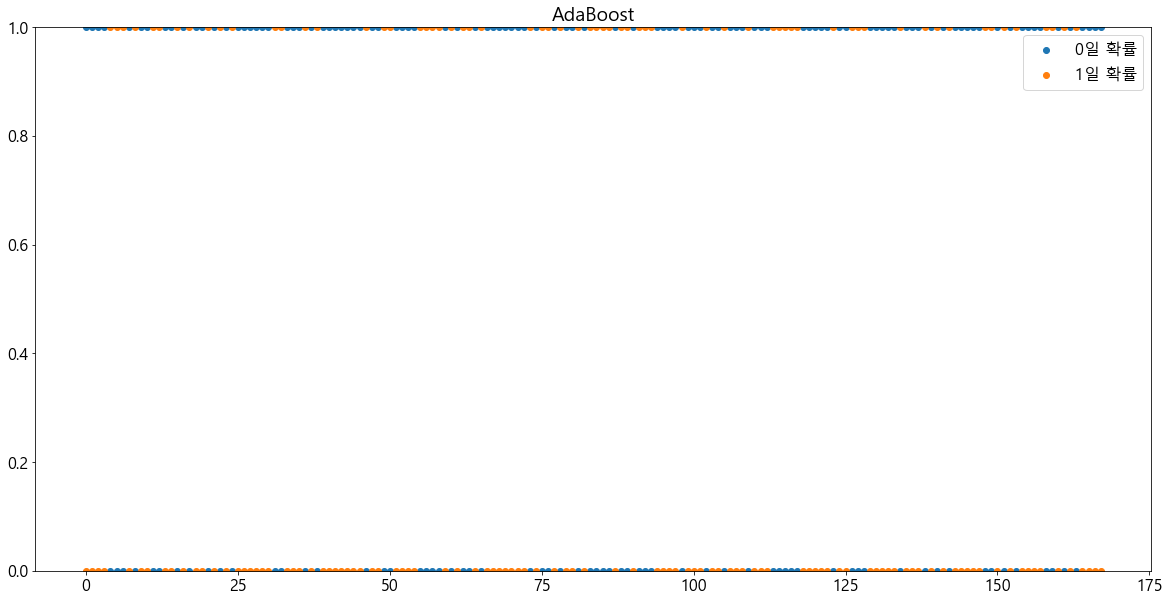

In [74]:
# 0일 확률들
a10 = y_pred_proba6[:, 0]
# 1일 확률들
a11 = y_pred_proba6[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('AdaBoost')
plt.show()


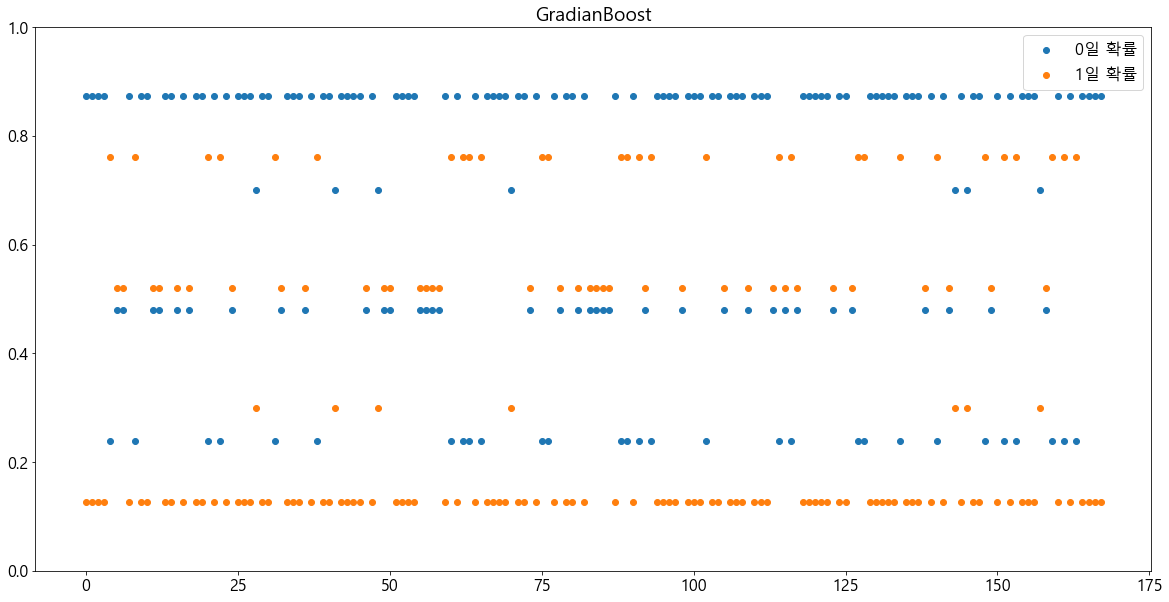

In [75]:
# 0일 확률들
a10 = y_pred_proba7[:, 0]
# 1일 확률들
a11 = y_pred_proba7[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('GradianBoost')
plt.show()


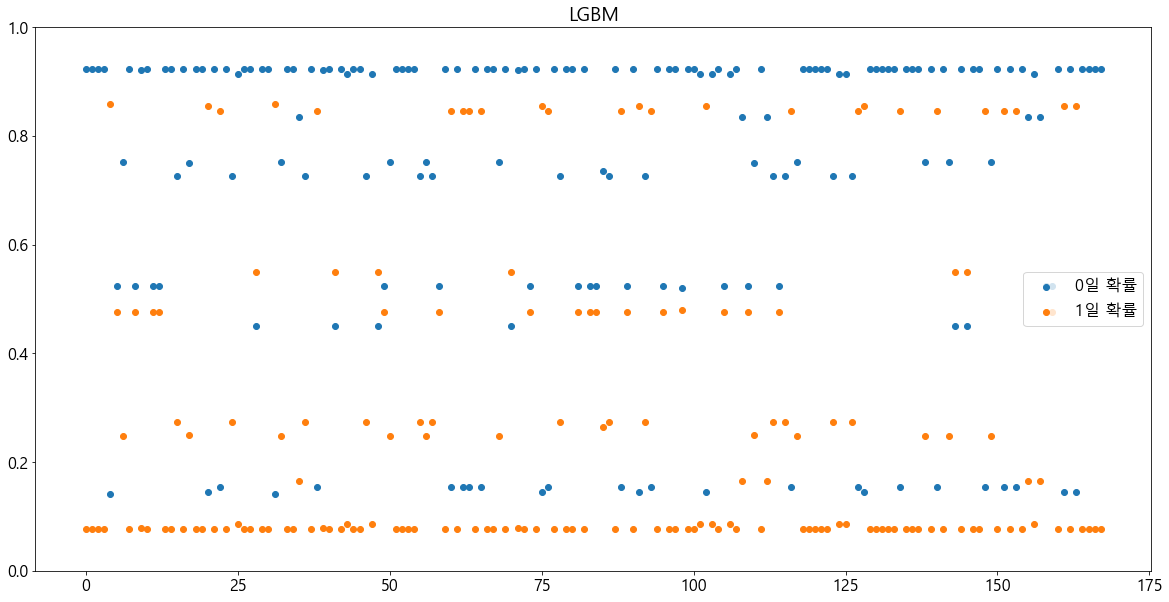

In [76]:
# 0일 확률들
a10 = y_pred_proba8[:, 0]
# 1일 확률들
a11 = y_pred_proba8[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('LGBM')
plt.show()


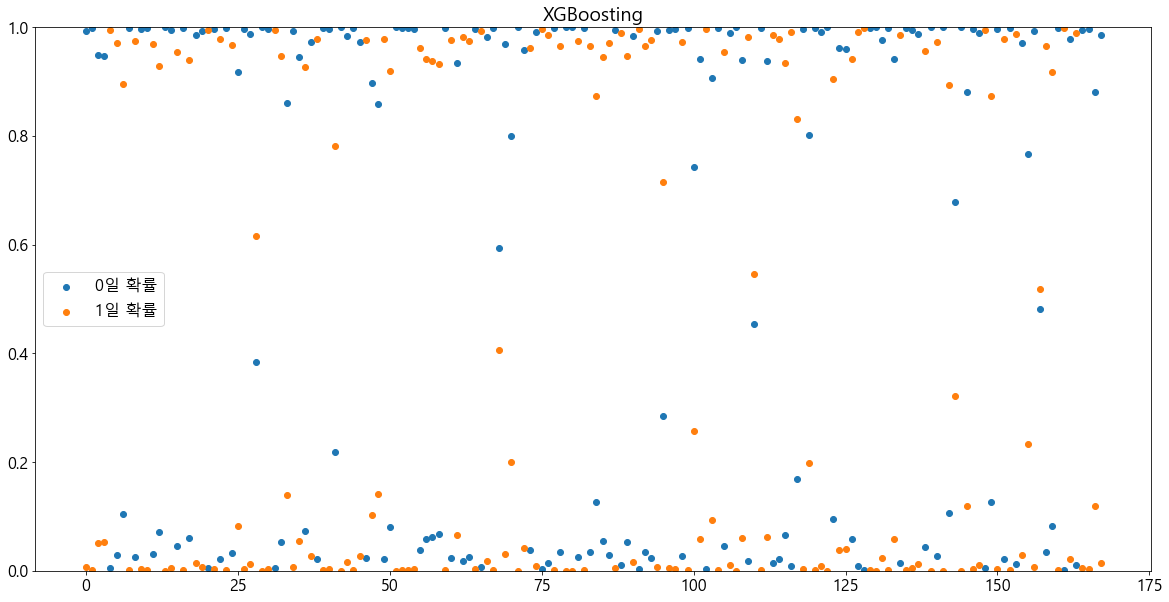

In [79]:
# 0일 확률들
a10 = y_pred_proba9[:, 0]
# 1일 확률들
a11 = y_pred_proba9[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('XGBoosting')
plt.show()


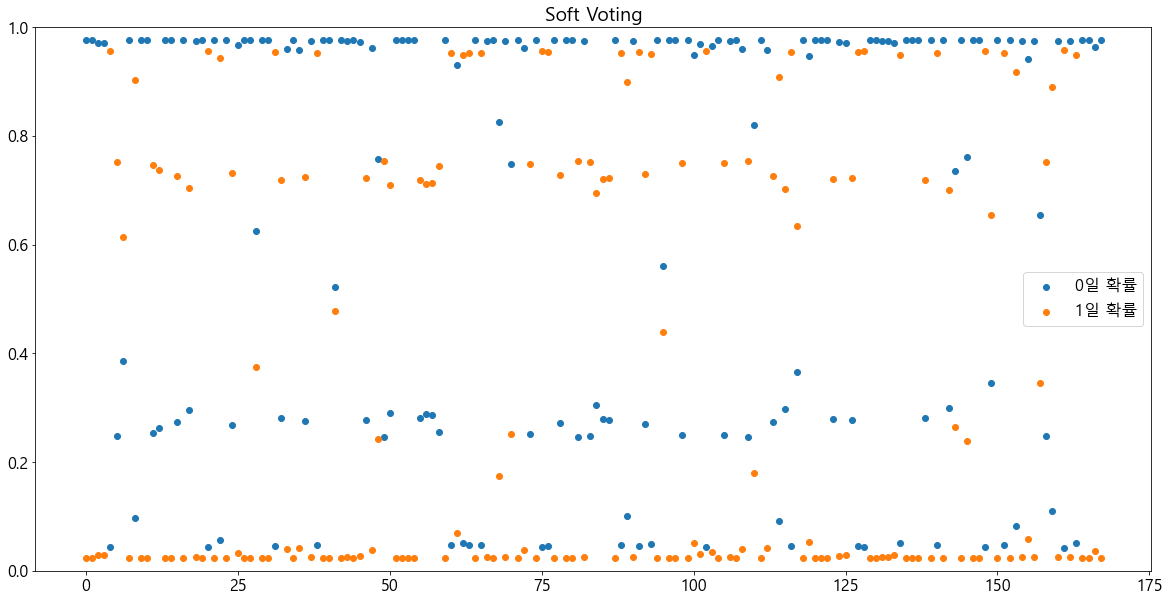

In [77]:
# 0일 확률들
a10 = y_pred_proba11[:, 0]
# 1일 확률들
a11 = y_pred_proba11[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('Soft Voting')
plt.show()


In [80]:
# 다른 모델들과 다른 답을 던지는 모델을 찾는다.
dict1 = {
    'KNN' : y_pred1,
    'LogisticRegression' : y_pred2,
    'SVC' : y_pred3,
    'DecisionTree' : y_pred4,
    'RandomForest' : y_pred5,
    'AdaBoost' : y_pred6,
    'GradianBoost' : y_pred7,
    'LGBM' : y_pred8,
    'XGBoost' : y_pred9,
    'Hard Voting' : y_pred10,
    'SoftVoting' : y_pred11
}

df100 = pd.DataFrame(dict1)

# 행별 총합을 구해 붙혀준다.
df100['total'] = df100.sum(axis=1)
df100


,KNN,LogisticRegression,SVC,DecisionTree,RandomForest,AdaBoost,GradianBoost,LGBM,XGBoost,Hard Voting,SoftVoting,total
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
163,1,1,1,1,1,1,1,1,1,1,1,11
164,0,0,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
# 행별 총합을 확인한다.
df100['total'].value_counts()


0     94
9     35
11    25
2      5
10     4
4      3
8      1
1      1
Name: total, dtype: int64

In [82]:
# 총합이 0과 11이 아닌 것들을 가져온다.
df200 = df100.query('total > 0 and total < 11')
df200


,KNN,LogisticRegression,SVC,DecisionTree,RandomForest,AdaBoost,GradianBoost,LGBM,XGBoost,Hard Voting,SoftVoting,total
5,1,1,1,0,1,1,1,0,1,1,1,9
6,1,0,1,0,1,1,1,0,1,1,1,8
8,1,1,1,1,1,1,1,0,1,1,1,10
11,1,1,1,0,1,1,1,0,1,1,1,9
12,1,1,1,0,1,1,1,0,1,1,1,9
15,1,1,1,0,1,1,1,0,1,1,1,9
17,1,1,1,0,1,1,1,0,1,1,1,9
24,1,1,1,0,1,1,1,0,1,1,1,9
28,0,1,0,1,0,0,0,1,1,0,0,4
32,1,1,1,0,1,1,1,0,1,1,1,9


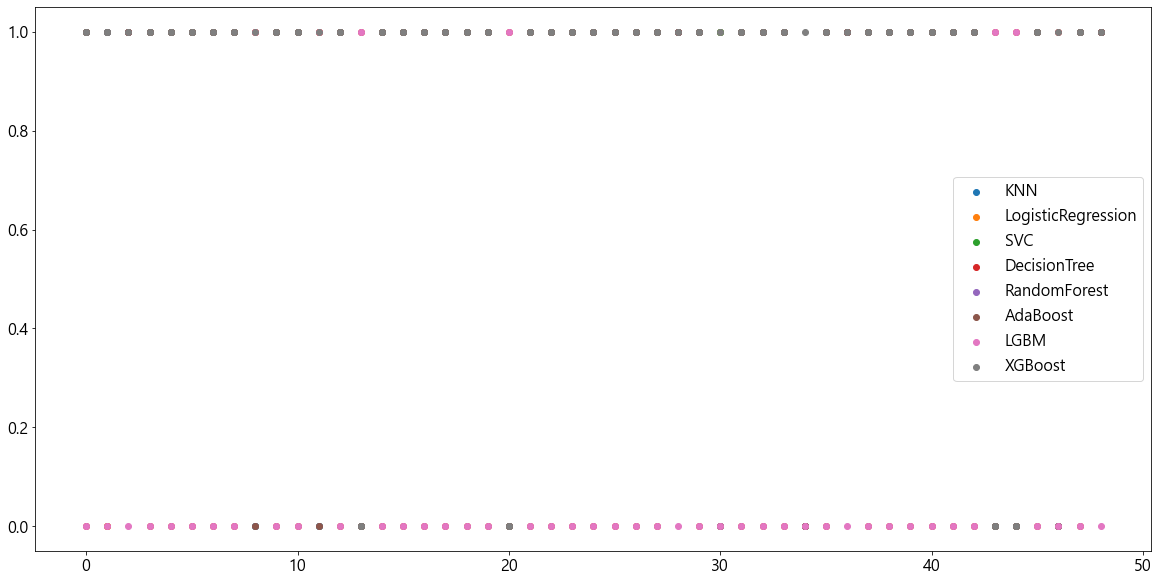

In [93]:
# 그래프를 그린다.
plt.scatter(list(range(len(df200['KNN']))), df200['KNN'], label='KNN')
plt.scatter(list(range(len(df200['LogisticRegression']))), df200['LogisticRegression'], label='LogisticRegression')
plt.scatter(list(range(len(df200['SVC']))), df200['SVC'], label='SVC')
plt.scatter(list(range(len(df200['DecisionTree']))), df200['DecisionTree'], label='DecisionTree')
plt.scatter(list(range(len(df200['RandomForest']))), df200['RandomForest'], label='RandomForest')
plt.scatter(list(range(len(df200['AdaBoost']))), df200['AdaBoost'], label='AdaBoost')
# plt.scatter(list(range(len(df200['GradianBoost']))), df200['GradianBoost'], label='GradianBoost')
plt.scatter(list(range(len(df200['LGBM']))), df200['LGBM'], label='LGBM')
plt.scatter(list(range(len(df200['XGBoost']))), df200['XGBoost'], label='XGBoost')
# plt.scatter(list(range(len(df200['Hard Voting']))), df200['Hard Voting'], label='Hard Voting')
# plt.scatter(list(range(len(df200['SoftVoting']))), df200['SoftVoting'], label='SoftVoting')


plt.legend()
plt.show()


In [94]:
# 최종 소프트보팅이 던지는 값을 최종 결과로 채택한다.
test_df["Outcome"] = y_pred11

test_df.to_csv("data/diabetes_result.csv")